In [1]:
!pip install git+https://github.com/onnx/tensorflow-onnx

  Cloning https://github.com/onnx/tensorflow-onnx to /tmp/pip-req-build-sf9jr49y
  Running command git clone --filter=blob:none --quiet https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-sf9jr49y
  Resolved https://github.com/onnx/tensorflow-onnx to commit ca17b3c99eb37dc3f42c9be5a64620d247a24115
  Preparing metadata (setup.py) ... - done
  Created wheel for tf2onnx: filename=tf2onnx-1.15.1-py3-none-any.whl size=454853 sha256=c13b1caf68f80255ca79a3ee52485d7671781ecc0fc86c786466c4b5eadf36e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9qxdem3/wheels/42/b4/7f/f00be6b8e1adcc24edcdd0d778f3416f568de22479ed30aab8
Successfully built tf2onnx


In [2]:
!pip install onnxruntime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00


In [3]:
#import all the requirements 
import numpy as np
import os
import tf2onnx
import onnx
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 100
IMAGE_SIZE = 128
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/"
CHANNELS=3


AUTOTUNE = tf.data.AUTOTUNE

In [5]:
image_gen_train = ImageDataGenerator(rescale=1./255, 
#                                      zoom_range=0.2, 
#                                      rotation_range=45,
                                     horizontal_flip=True,
                                     vertical_flip=True
                                    ) 
image_gen_val = ImageDataGenerator(rescale=1./255)

image_gen_train

In [6]:
train_ds = image_gen_train.flow_from_directory(
    directory=data_dir+"train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_ds = image_gen_val.flow_from_directory(
    directory=data_dir+"valid",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

# val_ds = image_gen_train.flow_from_directory(
#     directory=data_dir+"valid",
#     target_size=(224, 224),
#     color_mode="rgb",
#     batch_size=32,
#     class_mode="categorical",
#     shuffle=True,
#     seed=42
# )


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
train_ds.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [8]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D

# # Define the VGG-like model
# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# # model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# # model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# # model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Fully connected layers
# model.add(GlobalAveragePooling2D())
# # model.add(Dense(4096, activation='relu'))
# # model.add(Dense(4096, activation='relu'))
# model.add(Dense(train_ds.num_classes, activation='softmax'))  # 1000 classes for ImageNet, adjust for your task

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(0.0001),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
#     metrics=['categorical_accuracy']
# )
# model.summary()

In [9]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)

# # preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
#                                                include_top=False,
#                                                weights='imagenet')
# base_model.trainable = True

# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# # feature_batch_average = global_average_layer(feature_batch)
# prediction_layer = tf.keras.layers.Dense(train_ds.num_classes, activation='softmax')

# # prediction_batch = prediction_layer(feature_batch_average)


In [10]:
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                  include_top=False, 
                                                  weights='imagenet')
base_model.trainable =True
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(base_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=train_ds.num_classes, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)
# model.summary()

9406464/9406464 [==============================] - 1s 0us/step


In [11]:
# inputs = tf.keras.Input(shape=input_shape)
# # x = data_augmentation(inputs)
# # x = preprocess_input(inputs)
# x = base_model(inputs, training=True)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['categorical_accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [12]:

# model = tf.keras.applications.resnet.ResNet101(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=train_ds.num_classes,
# )

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.summary()

In [13]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 restore_best_weights = True,
                                                 verbose = 1,
                                                mode='min',)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = f"/kaggle/working/model.h5",
                                                  monitor = 'val_loss',
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                 mode='min')

# scheduler = tf.keras.optimizers.schedules.CosineDecay(0.01,100)

# schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)
callbacks = [earlystopping, checkpointer,
#              reduce_lr, 
#              schedule
            ]

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50


2023-11-07 20:39:16.253983: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2197/2197 [==============================] - ETA: 0s - loss: 0.4093 - categorical_accuracy: 0.8857
Epoch 1: val_loss improved from inf to 0.54390, saving model to /kaggle/working/model.h5
2197/2197 [==============================] - 432s 181ms/step - loss: 0.4093 - categorical_accuracy: 0.8857 - val_loss: 0.5439 - val_categorical_accuracy: 0.8367
Epoch 2/50
2197/2197 [==============================] - ETA: 0s - loss: 0.1184 - categorical_accuracy: 0.9638
Epoch 2: val_loss improved from 0.54390 to 0.10109, saving model to /kaggle/working/model.h5
2197/2197 [==============================] - 181s 82ms/step - loss: 0.1184 - categorical_accuracy: 0.9638 - val_loss: 0.1011 - val_categorical_accuracy: 0.9703
Epoch 3/50
2197/2197 [==============================] - ETA: 0s - loss: 0.0844 - categorical_accuracy: 0.9741
Epoch 3: val_loss improved from 0.10109 to 0.08195, saving model to /kaggle/working/model.h5
2197/2197 [==============================] - 180s 82ms/step - loss: 0.0844 - categori

In [14]:
model.load_weights("/kaggle/working/model.h5")

https://onnxruntime.ai/docs/tutorials/tf-get-started.html
https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/tensorflow-convert-model

In [15]:
import os
model.save("model2.h5")

In [16]:
print("Calculating model accuracy")
scores = model.evaluate(val_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

Calculating model accuracy
550/550 [==============================] - 29s 53ms/step - loss: 0.0119 - categorical_accuracy: 0.9965
Test Accuracy: 99.65%


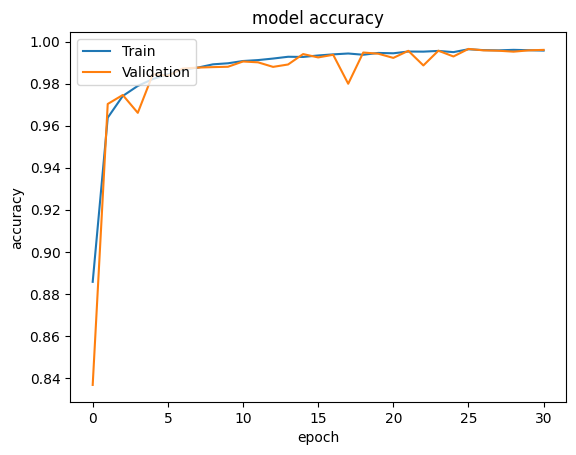

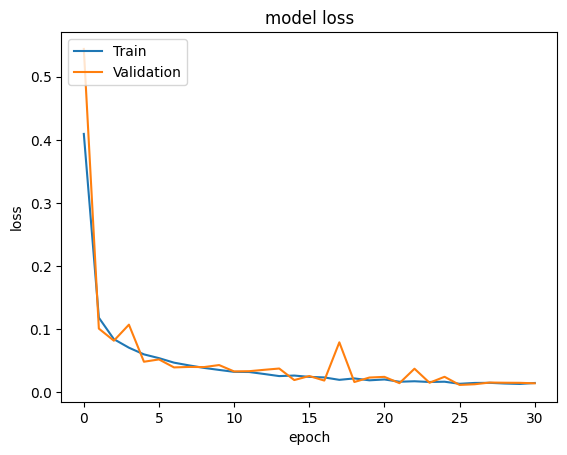

In [17]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


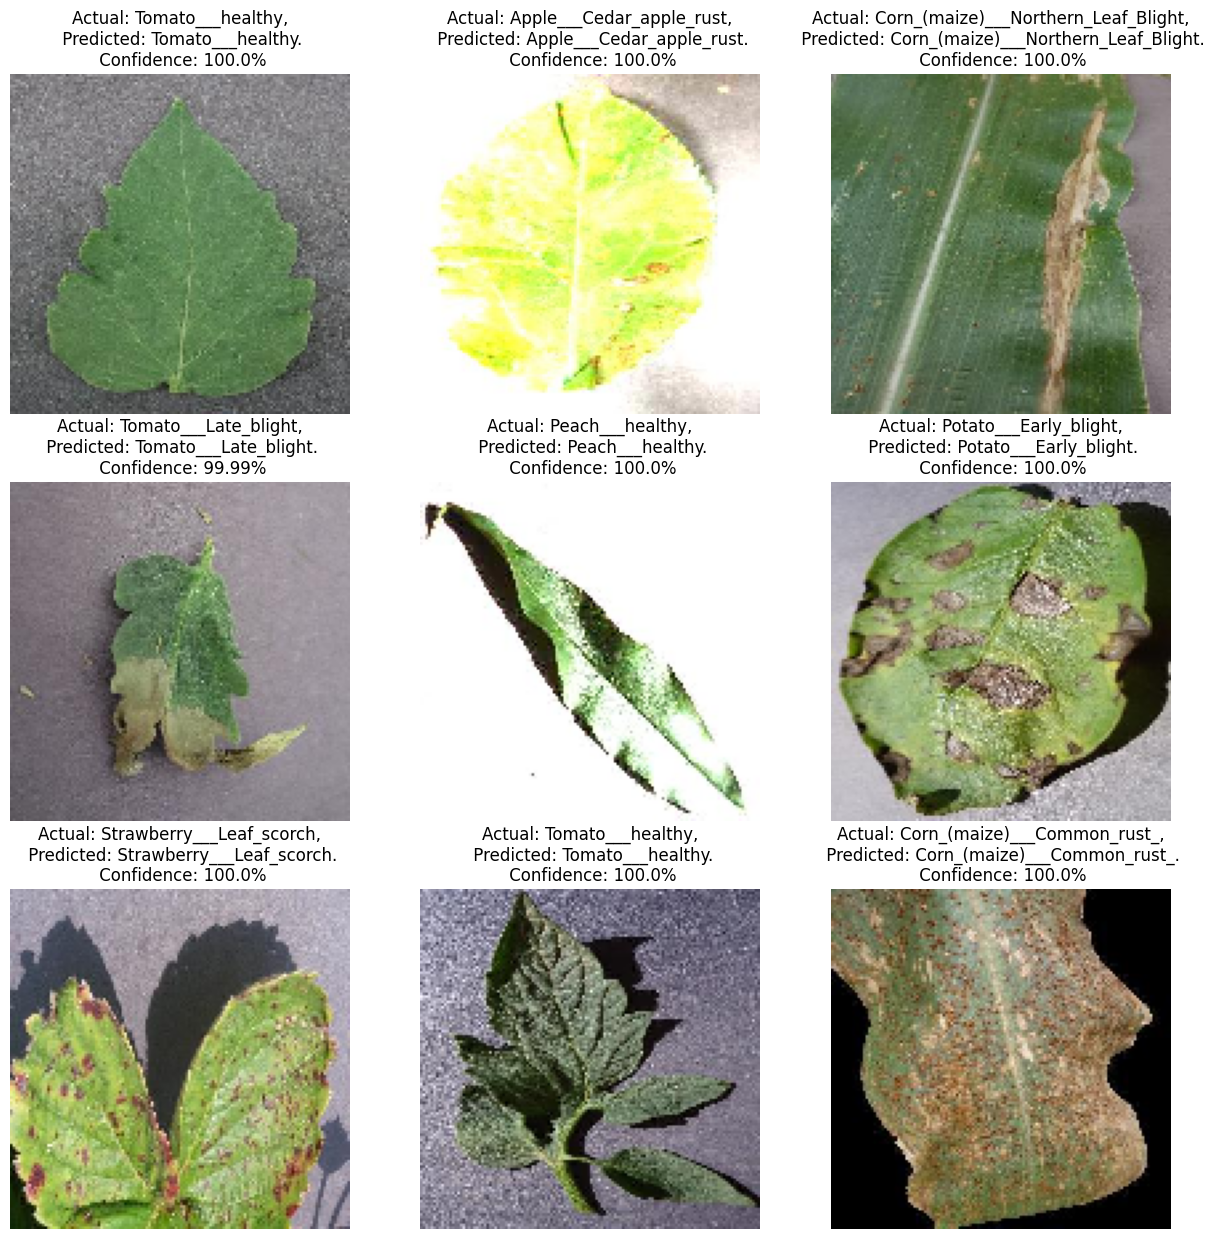

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array,verbose=False)

    predicted_class = labels_[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

labels_ = (train_ds.class_indices)
labels_ = dict((v,k) for k,v in labels_.items())
plt.figure(figsize=(15, 15))

for images, labels in val_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        
        actual_class = labels_[np.argmax(labels[i])] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
        
    break

In [19]:
#Create a Quantization Aware Model
!pip install --upgrade tensorflow-model-optimization
import tensorflow_model_optimization as tfmot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 12.5 MB/s eta 0:00:00


In [20]:
quantize_model = tfmot.quantization.keras.quantize_model(model)


In [21]:
quantize_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [22]:
history_quantized = quantize_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=1,
#     callbacks=callbacks
)

2023-11-07 22:18:12.601429: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/quant_dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2197/2197 [==============================] - 712s 308ms/step - loss: 0.0244 - categorical_accuracy: 0.9921 - val_loss: 0.1564 - val_categorical_accuracy: 0.9624


In [23]:
quantize_model.save("quantized_model.h5")

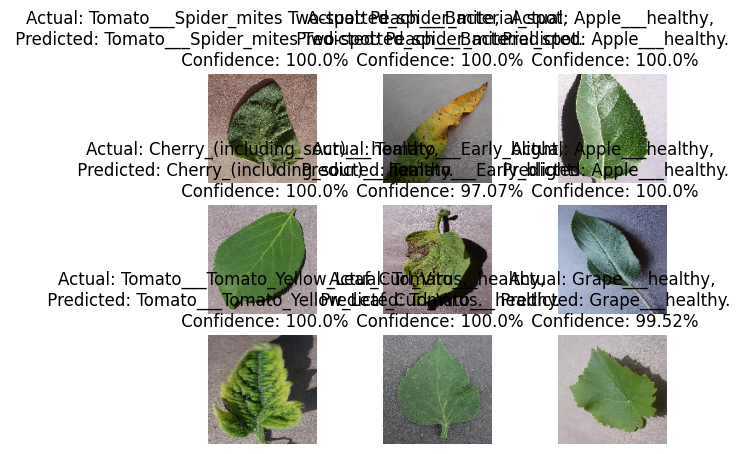

In [24]:
for images, labels in val_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(quantize_model, images[i])
        
        actual_class = labels_[np.argmax(labels[i])] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
        
    break

In [25]:
# _, baseline_model_accuracy = model.evaluate(
#     val_ds, verbose=0)

# _, q_aware_model_accuracy = quantize_model.evaluate(
#    val_ds, verbose=0)

# print('Baseline test accuracy:', baseline_model_accuracy)
# print('Quant test accuracy:', q_aware_model_accuracy)

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(quantize_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [27]:
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

In [28]:
import tempfile

# Create float TFLite model.
float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
float_tflite_model = float_converter.convert()

# Measure sizes of models.
_, float_file = tempfile.mkstemp('.tflite')
_, quant_file = tempfile.mkstemp('.tflite')

with open(quant_file, 'wb') as f:
  f.write(quantized_tflite_model)

with open(float_file, 'wb') as f:
  f.write(float_tflite_model)

print("Float model in Mb:", os.path.getsize(float_file) / float(2**20))
print("Quantized model in Mb:", os.path.getsize(quant_file) / float(2**20))

Float model in Mb: 19.736183166503906
Quantized model in Mb: 5.412025451660156


In [29]:
with open('non_quantized_float_tflite_model_model.tflite', 'wb') as f:
    f.write(float_tflite_model)

In [30]:
input_signature = [tf.TensorSpec([1,128,128,3], tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "model.onnx")

In [31]:
import onnxruntime as ort
import numpy as np

# Change shapes and types to match model
input1 = np.zeros((1, 128, 128, 3), np.float32)


sess = ort.InferenceSession("model.onnx", providers=["CUDAExecutionProvider"])

results_ort = sess.run([], {"x": input1})

import tensorflow as tf
# model = tf.saved_model.load("/kaggle/working/model.h5")
results_tf = model(input1)

for ort_res, tf_res in zip(results_ort, results_tf):
    np.testing.assert_allclose(ort_res[0], tf_res, rtol=1e-5, atol=1e-5)

print("Results match")

/opt/conda/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Results match
